In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import math

In [2]:
def filtered_by_position(df, position):
    return df[df.Pos == position]

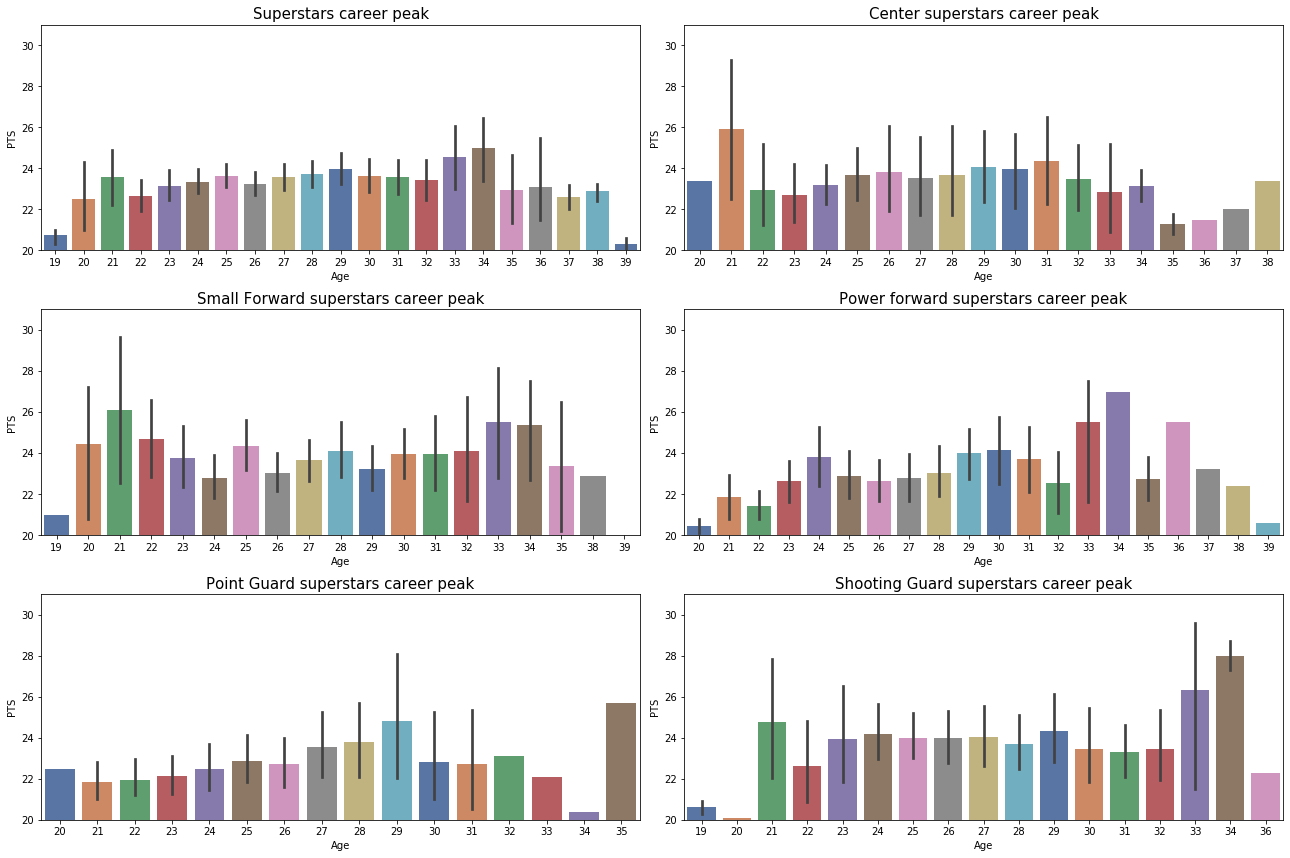

In [3]:
per_game = pd.read_csv('per_game.csv')
per_game = per_game[(per_game['PTS']>=20) & (per_game['Pos'].str.len() <= 2)] 
per_game = per_game.replace({'Pos': {'PG': 'Point Guard', 
                                     'SG': 'Shooting Guard', 
                                     'SF': 'Small Forward',
                                     'PF': 'Power forward', 
                                     'C': 'Center'}})

positions = per_game['Pos'].unique().tolist()

plt.figure(figsize=(18,12))
plt.subplot(3,2,1)
plt.title("Superstars career peak", fontdict={'fontsize': 15})
sns.barplot(x=per_game['Age'], y=per_game['PTS'], palette='deep')
plt.ylim(20,31)
plt.xlim=(18,40)

index = 2
for position in positions:
    plt.subplot(3,2,index)
    plt.title('{} superstars career peak'.format(position), fontsize=15)
    df = filtered_by_position(per_game, position)
    sns.barplot(x=df['Age'].astype(int), y=df['PTS'], palette='deep')
    plt.ylim(20,31)
    plt.xlim=(18,40)
    index += 1

plt.tight_layout(pad=1)

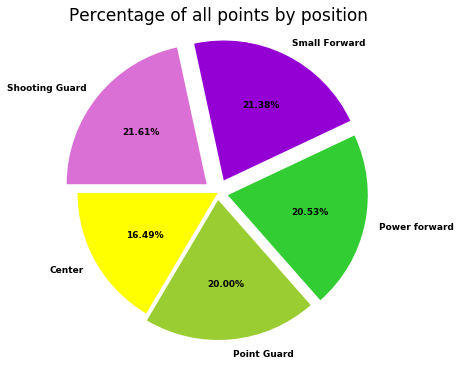

In [4]:
totals = pd.read_csv('season_totals.csv')

grouped_by_possition = pd.DataFrame(totals.groupby('Pos')['PTS'].agg(sum), index = totals['Pos']).drop_duplicates()
grouped_by_possition = grouped_by_possition[grouped_by_possition.index.str.len() <= 2]
grouped_by_possition = grouped_by_possition.rename(index={'PG': 'Point Guard', 
                                                          'SG': 'Shooting Guard', 
                                                          'SF': 'Small Forward',
                                                          'PF': 'Power forward', 
                                                          'C': 'Center'})
explode = [0,0.05,0.075,0.1,0.1]
colors = ['yellow', 'yellowgreen', 'limegreen', 'darkviolet', 'orchid']

plt.title('Percentage of all points by position', fontsize=17)
fig1 = plt.gcf()
fig1.set_size_inches(6,6)
plt.pie(grouped_by_possition['PTS'].tolist(), 
        labels=grouped_by_possition.index.tolist(), 
        colors=colors,
        autopct='%1.2f%%', 
        explode=explode, 
        startangle=180, 
        textprops={'weight':'bold', 
                   'fontsize':9})
plt.axis('equal')
plt.show(block=False)

In [5]:
df = pd.read_csv('countries.csv')

players_map = folium.Map(location=[56,24], zoom_start=3)
folium.Choropleth(
    geo_data='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json',
    name='NBA players exept USA',
    data=df,
    nan_fill_color='white',
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    legend_name = 'Players per country',
    highlight=True
).add_to(players_map)
folium.LayerControl().add_to(players_map)
players_map.save('Players_per_country.html')

https://aja-l.github.io/python/classD

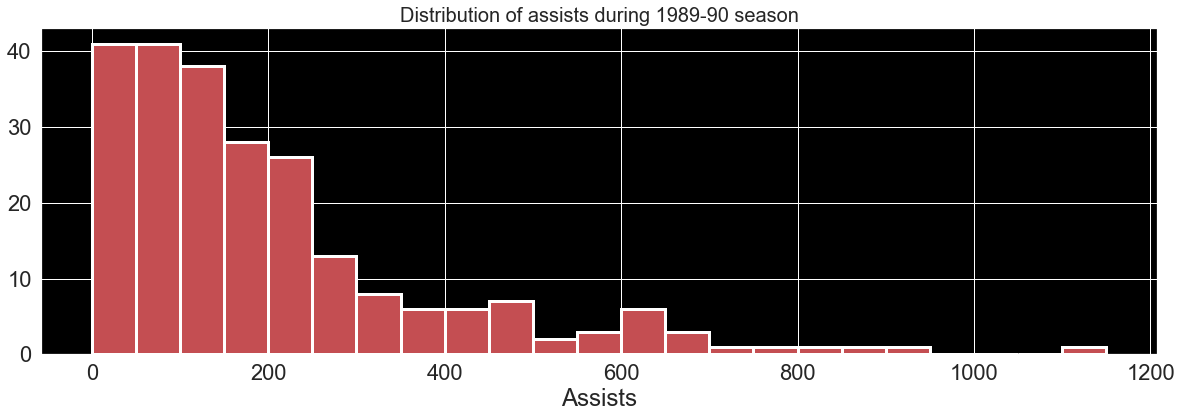

In [7]:
totals_by_seasons = pd.read_csv('season_totals.csv')
totals_by_seasons = totals_by_seasons.iloc[:, [1, 16]]
df = totals_by_seasons.copy()
df['AST'] = df.groupby('Season')['AST'].transform('sum')

df = df.drop_duplicates()
df = totals_by_seasons.loc[(totals_by_seasons.Season == totals_by_seasons.loc[df['AST'].idxmax()].Season) & 
                           (totals_by_seasons.AST > 0)]

bins_lst = np.arange(0, int(math.ceil(df['AST'].max() / 100.0))* 100 , 50).tolist()
fig2 = plt.subplot()
fig2.set_title('Distribution of assists during {} season'.format(df.loc[df['AST'].idxmax()].Season), 
              fontsize=20)
sns.distplot(df['AST'], 
             kde=False, 
             bins=bins_lst, 
             hist_kws={'histtype': 'barstacked', 
                       'linewidth': 3,
                       'alpha': 1, 
                       'color': 'r'}, 
             axlabel='Assists')
sns.set(rc={"figure.figsize": (20, 6), 
            'axes.facecolor': 'black', 
            'figure.facecolor': 'white'}, 
        font_scale = 2)


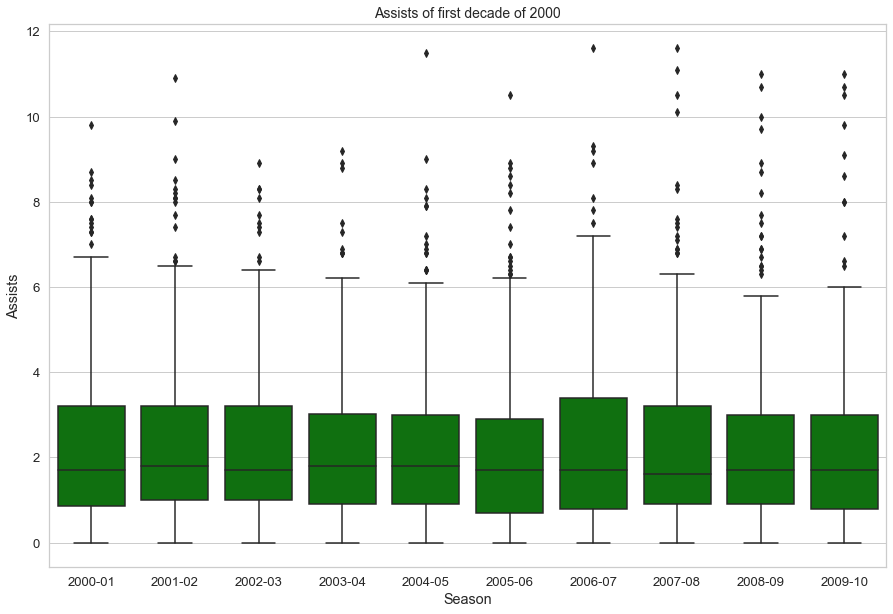

In [9]:
assists_of_00_decade = pd.read_csv('per_game.csv')
assists_of_00_decade = assists_of_00_decade[['Season', 'AST']]
assists_of_00_decade = assists_of_00_decade.loc[(assists_of_00_decade['Season'].str[:3] == '200')]

plt.figure(figsize=(15,10))
plt.title('Assists of first decade of 2000', fontsize=14)
fig3 = sns.boxplot(x=assists_of_00_decade['Season'], y=assists_of_00_decade['AST'], color='green')
fig3.set(ylabel = 'Assists')
sns.set(style='whitegrid', font_scale = 1.2)
fig3